

## Introduction 

The purpose of this notebook is to serve as an introduction to image processing and OpenCV. It is meant to serve as an introduction to image processing and computer vision. It is designed to help build intuition when getting started with working with image data. 

This is by no means a comprehensive study to all there is in the vast and interesting field of Image Processing. This is meant to be a tutorial for anyone looking to getting started with manipulating and analyzing images using computational methods in order to familiarize themselves with Computer Vision problems.

To get started, we will need: 
- OpenCV: https://opencv.org
- NumPy: https://numpy.org
- MatPlotLib: https://matplotlib.org


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [39]:
class ImageProcessing:

        
    def blur(self, image):
        
        kernel = np.ones((50,50),np.float32)/50**2
        blur_image = cv.filter2D(image,-1,kernel)
        
        return blur_image

    
    def black_and_white(self, image):
        
        image_bw = 0.114*image[:,:,0] + 0.587*image[:,:,1] + 0.299*image[:,:,2]
        
        return image_bw
    
    
    def blue_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,0] = image[:,:,0]
        
        return blue_image
    
    
    def green_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,1] = image[:,:,1]
        
        return blue_image
    
    
    def red_image(self, image):
        
        blue_image = np.zeros(image.shape)
        blue_image[:,:,2] = image[:,:,2]
        
        return blue_image
    
    
    def edges(self, image):
        
        sobelx = np.abs(cv.Sobel(image,cv.CV_64F,1,0,ksize=25))
        sobely = np.abs(cv.Sobel(image,cv.CV_64F,0,1,ksize=25))
        energy = np.sqrt(sobelx**2 + sobely**2).sum(axis=2)
    
        edges_image = energy*255.0/np.max(energy)
        
        return edges_image
    
        
    def sketch(self, image):
        bw = processimage.black_and_white(image)
        inverted = np.ones(bw.shape)*255 - bw
        kernel = np.ones((35,35),np.float32)/35**2
        blur_inv= cv.filter2D(inverted,-1,kernel)

        bw -= .01 #fix divide by zero issue 
        result = blur_inv *255/(255-bw)  
        result[result>255]=255 
        result[bw==255]=255 
        
        return result
    
    def oilpaint(self,image):
        #https://stackoverflow.com/questions/60016168/how-to-implement-a-photoshop-like-effect-oilpaint-effect-in-opencv
        kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (25,25))
        morph = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

        # brighten dark regions
        oilpaint = cv.normalize(morph,None,20,255,cv.NORM_MINMAX)
        
        return oilpaint
    
    


## Importing and Plotting Images

We can read in a photo using the imread function in OpenCV. To demonstrate the following image processing techniques, I will be using this photo I took in Bosnia and Herzegovina (local file: "bosnia.jpg"). 

To visualize the image within Jupyter Notebook, we can utilize MatPlotLib, which will plot the image data. MatPlotLib expects a RGB format, but CV provdes a BGR input, therefore we need to convert it before we plot the image. Below you can see the image outputted as expected.

In [3]:
image = cv.imread("bosnia.jpg")

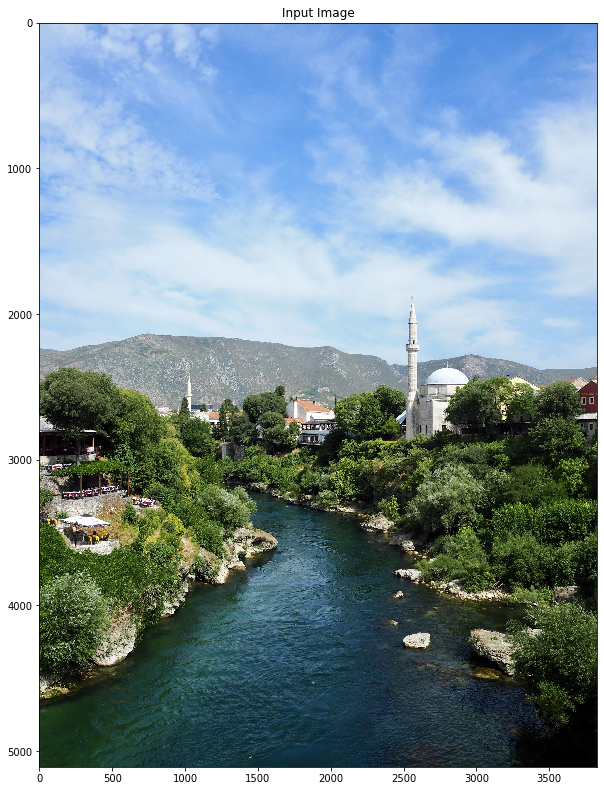

In [4]:
RGB_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize = (10,15))
plt.imshow(RGB_image)
plt.title('Input Image')
plt.show()

## Images as NumPy Arrays

You may be wondering why we are using NumPy in image processing, it is actually because an image is a three dimensional array. 

All images are numpy images with the following dimensions

(height, width, depth)

Looking at the dimensioned below we can think of it as three 5109 by 3831 images combined. We have three of these images, because this is a colored image and we have one for each channel: R, B, G, in other words: red, blue, and green. 

In [5]:
image.shape

(5109, 3831, 3)

## Image Processing

Now that we have a basic understanding of images and their data type, we can get started with some simply image processing by manipulating the numpy arrays. For the following Image Processing demonstrations, I will be using functions built in the Image Processing Class. Please refer to the code above to see how each portion is performed. 

In [40]:
processimage = ImageProcessing()

## Blurring an Image

Blurring an image is a simple process. We can simply use 
You can also try building this from scratch, by looping through each array, and taking the average of a certain area's pixel values. 

You might be wondering what the purpose of blurring an image may be, actually this is incredibly important in many parts of Computer Vision.

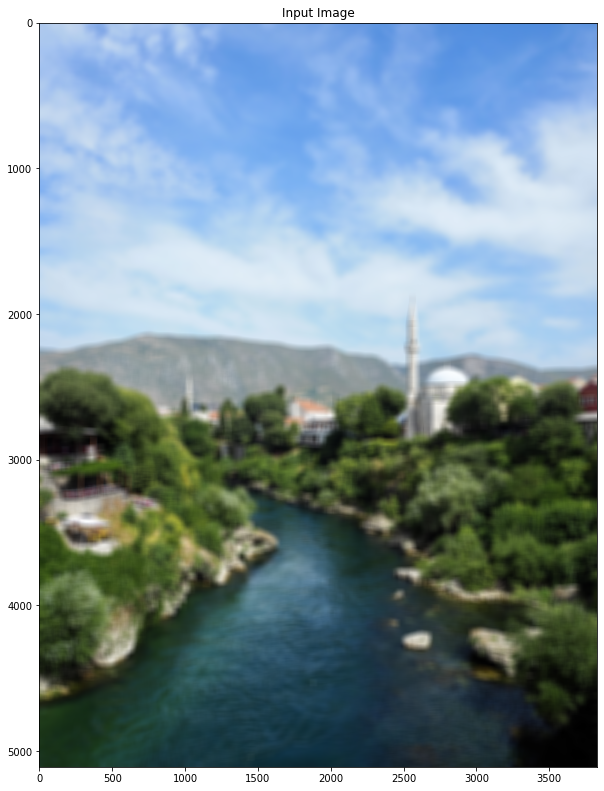

In [7]:
blur = processimage.blur(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

## Black and White

As mentioned previously, in each image we have three channels. A black and white image is simply a one channel image. In a sense we can "flatten" a colored image by combining all three channels into one. 

Each pixel is on a 0 to 255 scale. 0 being this color and 255 being this other color. 

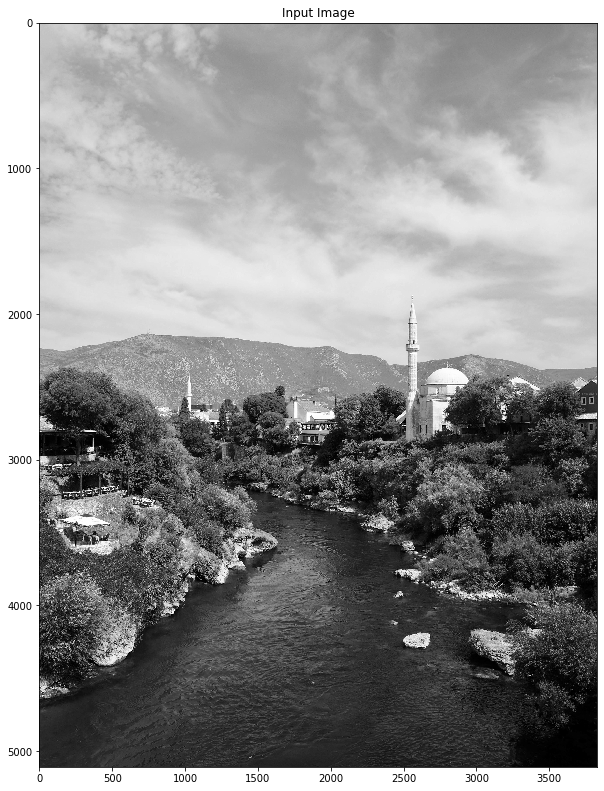

In [84]:
bw = processimage.black_and_white(image)
plt.figure(figsize = (10,15))
plt.imshow(bw, cmap="gray")
plt.title('Input Image')
plt.show()

## Isolating Color Channels

We can also change the color of an image by isolating the color channels. 

Another cool trick with NumPy is that we can stitch images together using basic numpy manipulation. 

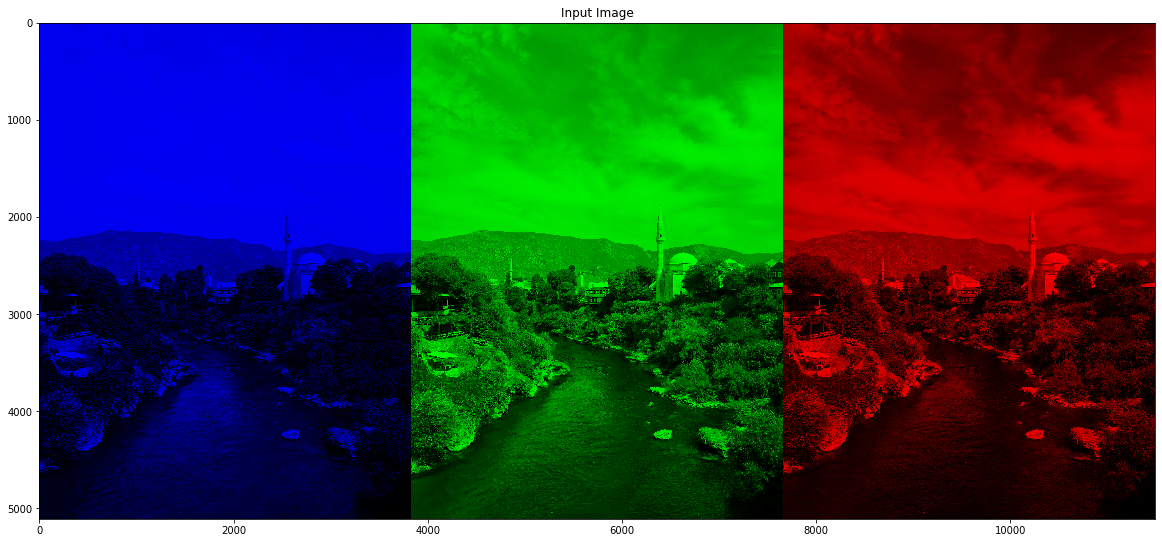

In [22]:
blue = processimage.blue_image(image)
green = processimage.green_image(image)
red = processimage.red_image(image)

combinedimage = np.zeros((5109, 3831*3, 3))
combinedimage[:,0:3831,:] = blue
combinedimage[:,3831:3831*2,:] = green
combinedimage[:,3831*2:3831*3,:] = red

cv.imwrite("combined.png",combinedimage)

blue_green_red = cv.imread("combined.png")
RGB_image = cv.cvtColor(blue_green_red, cv.COLOR_BGR2RGB)
plt.figure(figsize = (20,30))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()

## Edges of an image

In the following image we are getting the edges of an image by calculating an energy function in which we use the sobel function of x and y to get the image. It is essentially a derivative of an image. Edges are incredibly important part of Computer Vision. How are the edges defined, well areas of high change is what determines if something is an edge or not. One use of this is for seam carving, which is a content aware resizing method that determines what parts of the image can be cut out. 


As you can see the mathematical method of determining the outline is quite accurate. 

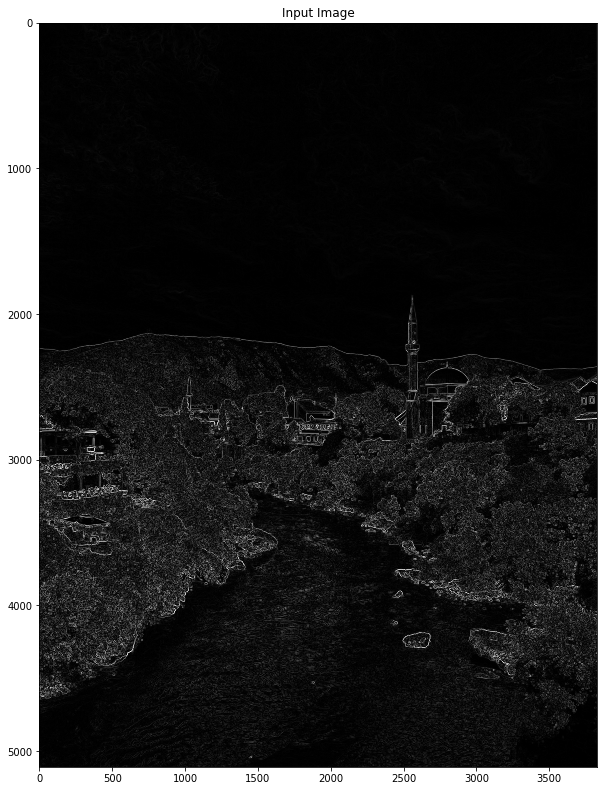

In [87]:
edges = processimage.edges(image)
plt.figure(figsize = (10,15))
plt.imshow(edges, cmap="gray")
plt.title('Input Image')
plt.show()

## Sketch Effect

Using some of the techniques previously introduced we can create a sketch like effect on an image. In order to do this. 

First we need to get a black and white version of our image, which we can call our black and white function we previously wrote. Next we invert the image. Remmeber when I mentioned that pixels are on a scale of 0 to 255? Inverting simply means subtracting the pixel value from 255. We can do this by creating a numpy array of all 255 valued pixels and subtracting our black and white version.

Next we blur our inverted image. And then the final result is a combination of the black and white image and the blur image. We use a gaussian blur of a smaller kernele size because it makes the image a little sharper. How much too little of a blur the image becomes more faint. 

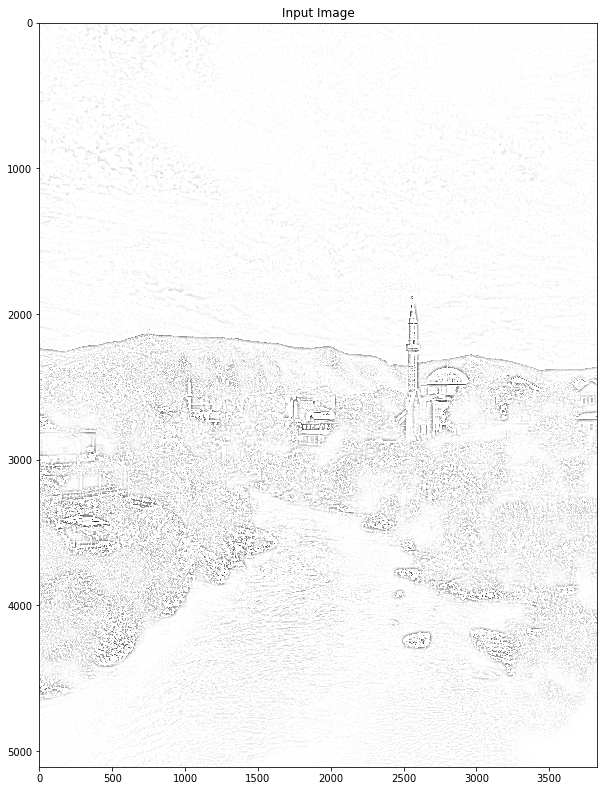

In [41]:
sketch = processimage.sketch(image)
plt.figure(figsize = (10,15))
plt.imshow(sketch, cmap="gray")
plt.title('Input Image')
plt.show()

## Oil Painting 

Finally, we can also give an image an oil painting effect. 
As you can see, it looks more like a monet watercolor but definitely is not the same as the Gaussian blur effect. 

OpenCV has a lot of fun effects that can be applied such as this one. Please check out their site and google for more effects similar to this. 

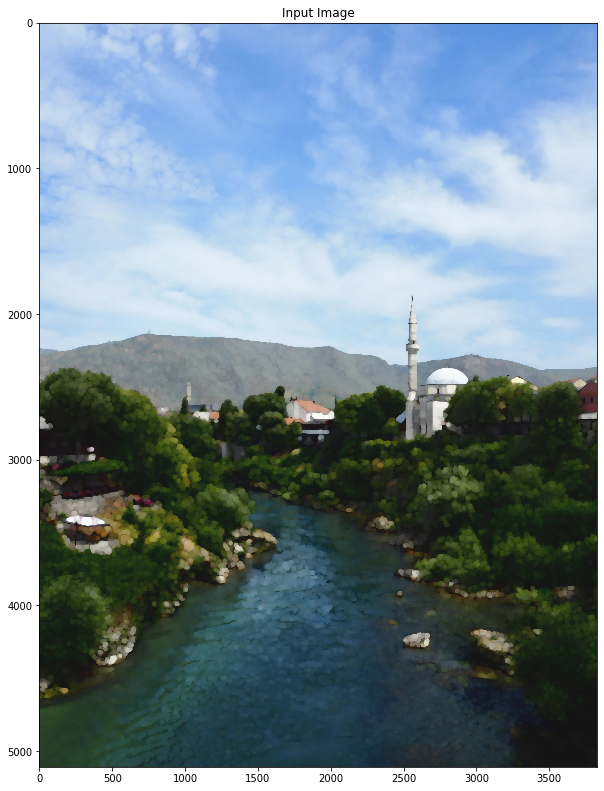

In [91]:
blur = processimage.oilpaint(image)
RGB_image = cv.cvtColor(blur, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10,15))
plt.imshow(RGB_image, cmap="gray")
plt.title('Input Image')
plt.show()